# Python for Finance: Simple vs Log Returns and Normality Assumption

# THE MAIN REASON

In [3]:
import datetime as dt
import pandas as pd
import numpy as np
import pylab
import seaborn as sns
import scipy.stats as stats
from pandas_datareader import data as pdr
import plotly.offline as pyo

import yfinance

pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly'

In [15]:
yfinance.pdr_override()

end = dt.datetime.now()
start = dt.datetime(2018,1,1)

df = pdr.get_data_yahoo('CBA.AX', start, end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,80.300003,80.330002,79.779999,80.220001,60.037670,1284609
2018-01-03,80.470001,80.644997,80.059998,80.139999,59.977795,1349269
2018-01-04,80.480003,80.480003,79.809998,79.970001,59.850563,1596303
2018-01-05,80.540001,81.250000,80.370003,81.160004,60.741177,2208531
2018-01-08,81.400002,81.750000,81.300003,81.620003,61.085442,1293549


# Part 1 : Simple vs. Log Returns

In [6]:
simple_returns = df.Close.pct_change().dropna()
simple_returns

Date
2018-01-03   -0.000997
2018-01-04   -0.002121
2018-01-05    0.014881
2018-01-08    0.005668
2018-01-09    0.006984
                ...   
2024-02-15    0.000789
2024-02-16    0.018570
2024-02-19    0.007310
2024-02-20   -0.001537
2024-02-21   -0.019923
Name: Close, Length: 1553, dtype: float64

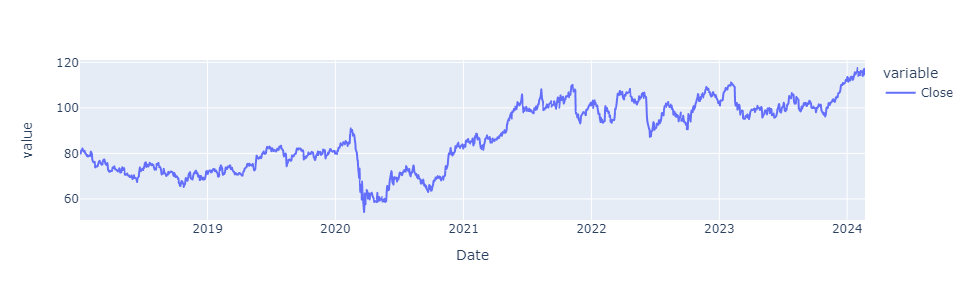

In [8]:
df.Close.plot().update_layout(autosize = False, width=500, height=300)

In [9]:
print('First', df.Close[0], 'Last', df.Close[-1])

First 80.22000122070312 Last 114.62000274658203


Use simple returns and attempt to compute final price from starting price over time horizon

In [10]:
simple_returns.mean()

0.00033695674013426005

In [16]:
# example without using formula
df.Close[0] * (1+simple_returns.mean())**len(simple_returns)

135.36550293442693

In [13]:
# last return price given the entire time series
df.Close[0] * np.prod([(1 + Rt) for Rt in simple_returns])

114.6200027465817

## Log Returns

In [19]:
log_returns = np.log(df.Close/df.Close.shift(1)).dropna()
log_returns

Date
2018-01-03   -0.000998
2018-01-04   -0.002124
2018-01-05    0.014771
2018-01-08    0.005652
2018-01-09    0.006959
                ...   
2024-02-15    0.000789
2024-02-16    0.018400
2024-02-19    0.007283
2024-02-20   -0.001538
2024-02-21   -0.020124
Name: Close, Length: 1553, dtype: float64

In [21]:
log_returns.mean()

0.0002297807195925578

In [23]:
df.Close[0] * np.exp(len(log_returns) * log_returns.mean())

114.62000274658178

### If we want to model returns using the normal distribution!
SIMPLE RETURNS: The product of normally distribution variables is NOT normally distributed

LOG RETURNS: The sum of normally distributed variables follows a normal distribution

## Histogram of log returns

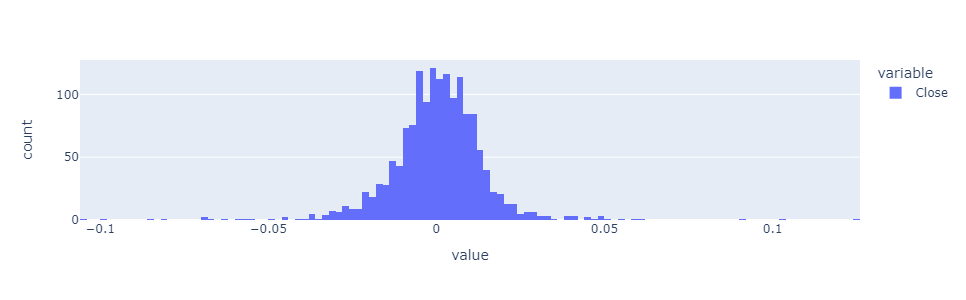

In [25]:
log_returns.plot(kind='hist').update_layout(autosize = False, width=500, height=300)

## Is normailty a good assumption for financial data?
The assumption that prices, or more accurately log returns are normally distributed!

In [42]:
log_returns_sorted = log_returns.tolist()
log_returns_sorted.sort()
worst = log_returns_sorted[0]
best =  log_returns_sorted[-1]

std_worst = (worst -  log_returns.mean()/log_returns.std())
std_best = (best -  log_returns.mean()/log_returns.std())

print('Assuming price is normally distributed: ')
print('Std dev. worst %.2f best %.2f' %(std_worst, std_best))
print('Probability of worst %.13f and best %.13f' %(stats.norm(0, 1).pdf(std_worst), stats.norm(0, 1).pdf(std_best)))


Assuming price is normally distributed: 
Std dev. worst -0.12 best 0.11
Probability of worst 0.3960268462006 and best 0.3965861991499


# Part 2: Testing for Normality

### Q-Q or Quantile-Quantile Plots
It plots two sets of quantiles against one another i.e. theoretical quantiles against the actual quantiles of the variable.

Q-Q Plot


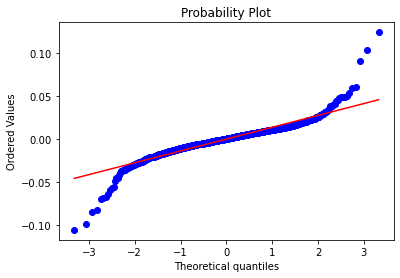

In [43]:
stats.probplot(log_returns,dist='norm', plot=pylab)
print('Q-Q Plot')

### Box Plots
Box Plot also know as a box and whisker plot is another way to visualize the normality of a variable. It displays the distribution of data based on a five-number summary i.e. minimum, first quartile (Q1), median (Q2), third quartile (Q3) and maximum.

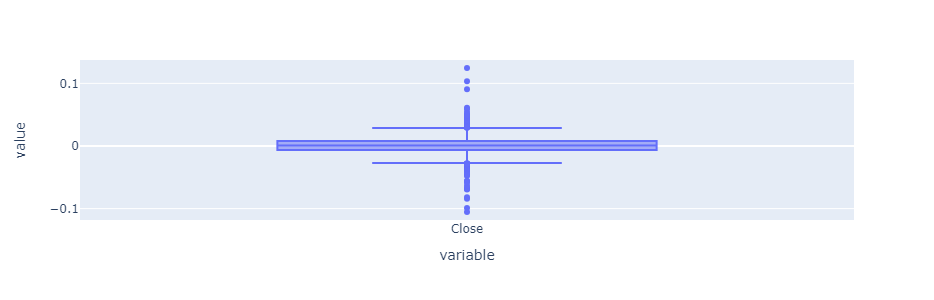

In [46]:
log_returns.plot(kind= 'box').update_layout(autosize = False, width=500, height=300)

## Hypothesis Testing / Statistical Inference ?

### Kolmogorov Smirnov test

In [47]:
ks_test, p_value = stats.kstest(log_returns, 'norm')
print(ks_test, p_value)
if p_value > 0.05:
    print('Probability Guassian')
else:
    print('Probably NOT Guassian')

0.4761119478186332 0.0
Probably NOT Guassian


### Shapiro Wilk test

In [48]:
sw_stat, p_value = stats.shapiro(log_returns)
print(sw_stat, p_value)
if p_value > 0.05:
    print('Probability Guassian')
else:
    print('Probably NOT Guassian')

0.8848485946655273 1.749544519120856e-32
Probably NOT Guassian
